# Logistic regression for detecting fraud in credit card transactions

Data set obtained from kaggle on [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)

Goal: Build a logistic regression model in order to detect fraud in credit card transactions.

## Phase 1. Prepare the data

Load needed packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

seed = 1 # random state for reproducible results

Load the data

In [2]:
data = pd.read_csv("creditcard.csv")

What are the data types?

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

According to documentation, Class column includes 1's when a transaction is considered fraud and 0's when it's non fraud. This is a binary variable and it will be our response variable for our classifiers. A binary variable is a special case of a categorical one so, we need to change the data type to categorical. The other variables are all numeric. Columns starting with "V" are the principal components from a previosly applied Principal Component Analysis. Also, time variable indicates time after the first transaction, so it's going to be excluded but we will apply stratified sampling to avoid bias.

## Phase 2. Process the data

Are there missing data?

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Luckily, there is no missing data.

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


We computed statistical summaries in order to check if there are not outliers. It would be helpful to see the distribution of amount since it seems it has a skewed distribution.

<AxesSubplot:xlabel='Amount'>

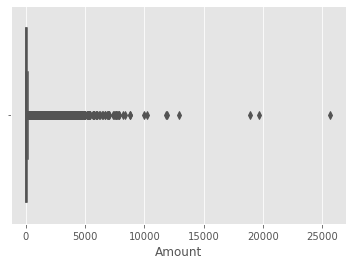

In [6]:
plt.style.use('ggplot')
sns.boxplot(x = "Amount", data = data)

Amount has a highly skewed distribution. It would be convenient to scale it.

## Phase 3. Analysis

To visualize all the variables in a two dimensional space, we can apply t-sne. It's going to help us clustering the transactions and see which ones are fraud and non fraud. But first, I encourage to take a small representative fraction of the sample to avoid really long waiting times.

In [7]:
from sklearn.model_selection import train_test_split

y = data["Class"].astype("category")
X = data.drop(["Class", 'Time', 'Amount'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = seed)

In [8]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_over, y_over = undersample.fit_resample(X_train, y_train)

<AxesSubplot:xlabel='Class', ylabel='count'>

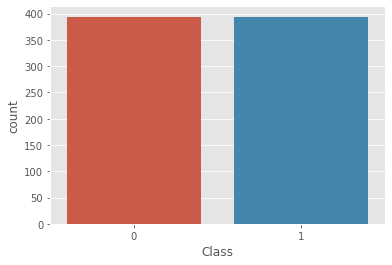

In [9]:
sns.countplot(x = y_over)

We get samples from the training set containing 397 fraud and 397 non fraud transactions. 

In [10]:
from sklearn.manifold import TSNE
x_tsne = TSNE(n_components = 2, random_state = seed).fit_transform(X_over.values)

<AxesSubplot:>

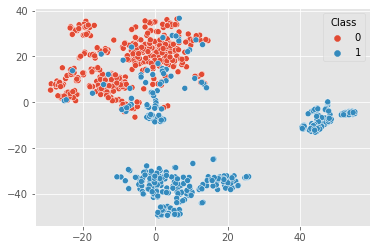

In [11]:
sns.scatterplot(x = x_tsne[:,0], y = x_tsne[:,1], hue = y_over)

We can see that a model could correctly classify most of the transactions

### Model fitting

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

logreg = LogisticRegression(random_state = seed)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56854    10]
 [   28    70]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.71      0.79        98

    accuracy                           1.00     56962
   macro avg       0.94      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962



We get a model with 0.79 f1-score evaluated on the test set, which is something decent. With unbalanced datasets it is recommended to evaluate models with f1-score.

### Validation

In [13]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X_train, y_train, scoring = 'f1', cv = 5)
print('Mean f1-score is: {}'.format(scores.mean()))

Mean f1-score is: 0.7160051838882231


In the training set, with cross validation, we get a mean f1 score of 0.71. This means that the model performs best with unseen data, this might be a sign of underfitting.

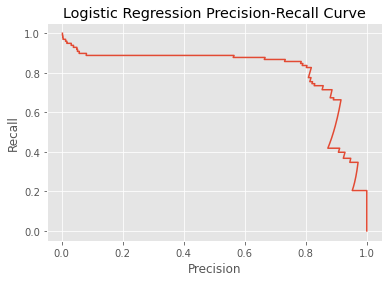

In [14]:
from sklearn.metrics import precision_recall_curve
y_pred_prob = logreg.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label = 'Logistic regression')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Logistic Regression Precision-Recall Curve')
plt.show()

Here we have a decent Precision-Recall curve with our logistic regression model.

### Hyperparameter tuning

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': np.arange(0.1,1,0.1)}
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5, scoring = 'f1')

logreg_cv.fit(X_train, y_train)
print('The best regularization parameter is: {}. With an f1 score of: {}'.format(logreg_cv.best_params_,logreg_cv.best_score_))

The best regularization parameter is: {'C': 0.9}. With an f1 score of: 0.7160051838882231


This implies that the best regularization parameters found with cross validation doesn't perform much better than the default parameter of 1. So, we can keep with the original model without applying hyper parameter tuning.

### Pipeline

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

steps = [('scaler', RobustScaler()),('logreg', LogisticRegression())]
pipeline = Pipeline(steps)

cv = GridSearchCV(pipeline, param_grid = {'logreg__C': np.arange(0.1,1,0.1)}, cv = 5, scoring = 'f1')
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)
print(cv.best_params_)
print(cv.best_score_)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

{'logreg__C': 0.4}
0.7160051838882231
[[56855     9]
 [   28    70]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.71      0.79        98

    accuracy                           1.00     56962
   macro avg       0.94      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962



## Conclusion

This model can detect fraud nearly 70% of the time. While also, it's going to classify almost 100% of the time non fraud transactions right. This model can be useful in order to try to detect fraud transactions but it needs to be used with another tool in order to be effective on real applications.